In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# 1. Load Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Normalize Pixel Values
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. One-hot Encode Labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# 4. Build Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes (digits 0–9)
])

# 5. Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train Model
model.fit(x_train, y_train_cat, epochs=5, validation_split=0.1)

# 7. Evaluate
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")

# 8. Predict on Test Sample
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8678 - loss: 0.4519 - val_accuracy: 0.9675 - val_loss: 0.1156
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9655 - loss: 0.1149 - val_accuracy: 0.9717 - val_loss: 0.0932
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9780 - loss: 0.0721 - val_accuracy: 0.9738 - val_loss: 0.0903
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9816 - loss: 0.0583 - val_accuracy: 0.9717 - val_loss: 0.0986
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9864 - loss: 0.0418 - val_accuracy: 0.9777 - val_loss: 0.0893
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.0950
Test Accuracy: 0.9761
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


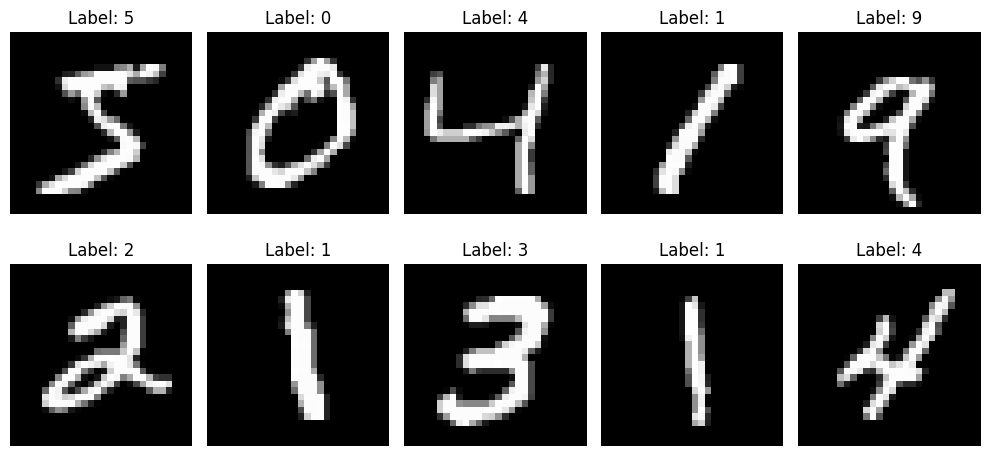

In [3]:
# Display some images from the training set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
model.save("digit_classifier.h5")
